In [1]:
import tester as test
import pandas as pd


In [2]:
tc = 0.00007
df = pd.read_csv('data_small.csv', parse_dates = {'Datetime': ['Date', 'Time']}, index_col = 'Datetime')

In [3]:
test = test.MeanRevBacktester('DAX', 30, 2, '2010-03-01', '2021-10-12', tc, df)

In [4]:
test.test_strategy()

(0.925305, -0.353793)

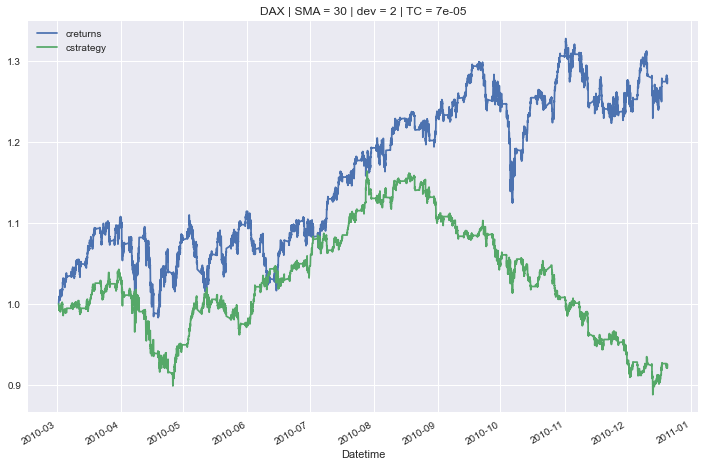

In [5]:
test.plot_results()

In [6]:
test.optimize_parameters((10,30), (2,5))

((29, 4), 1.170345)

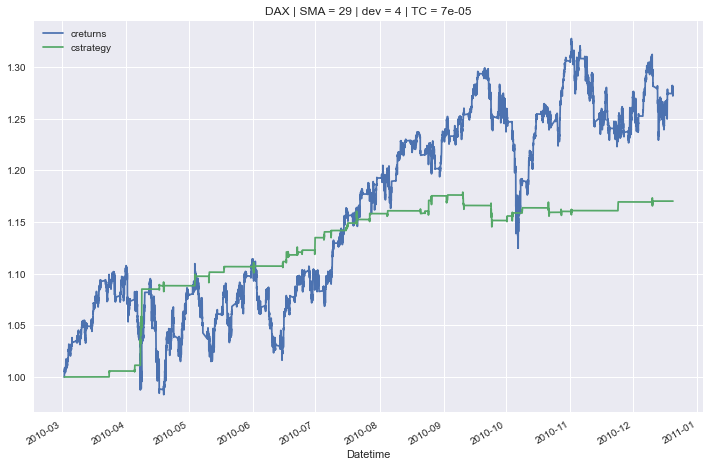

In [7]:
test.plot_results()

In [8]:
test.results_overview

,SMA,dev,performance
0,10,2,0.997794
1,10,3,1.000000
2,10,4,1.000000
3,11,2,0.985048
4,11,3,0.997813
5,11,4,1.000000
6,12,2,1.105270
7,12,3,1.000047
8,12,4,1.000000
9,13,2,1.079777


In [9]:


raw = data  
raw = raw[symbol].to_frame().dropna()
raw = raw.loc[start : end]
raw.rename(columns={symbol: "price"}, inplace = True)
raw["returns"] = np.log(raw / raw.shift(1))
data = raw


title = "{} | Start = {} | End = {}".format(symbol , start, end)
data['price'].plot(title=title, figsize= (12,8), )       





data = data.copy()
data['SMA'] = data['price'].rolling(SMA).mean()
data['Lower'] = data['SMA'] - data['price'].rolling(SMA).std() * dev
data['Upper'] = data['SMA'] + data['price'].rolling(SMA).std() * dev
data = data


SMA = SMA
data["SMA"] = data["price"].rolling(SMA).mean()
data["Lower"] = data["SMA"] - data["price"].rolling(SMA).std() * dev
data["Upper"] = data["SMA"] + data["price"].rolling(SMA).std() * dev

if dev is not None:
dev = dev
data["Lower"] = data["SMA"] - data["price"].rolling(SMA).std() * dev
data["Upper"] = data["SMA"] + data["price"].rolling(SMA).std() * dev



data = data.copy().dropna()
data["distance"] = data.price - data.SMA
data["position"] = np.where(data.price < data.Lower, 1, np.nan)   #oversold - LONG!
data['position'] = np.where(data.price > data.Upper, -1, data.position)   #overbought - SHORT!
data['position'] = np.where(data.distance * data.distance.shift(1) < 0, 0, data.position) #price crossing SMA - stay neutral
data['position'] = data.position.ffill().fillna(0)  #if none of above is True hold neutral position
data['strategy'] = data.position.shift(1) * data["returns"]
data.dropna(inplace = True)

#determine number of trades in each bar, each trade = .5 spread
data['trades'] = data.position.diff().fillna(0).abs()

#substracting trading cost from gross return
data.strategy = data.strategy - data.trades * tc

#computing cumulative returns
data['buy&hold'] = data['returns'].cumsum().apply(np.exp)
data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)
results = data

#computing performance
perf = data.cstrategy.iloc[-1]                 #abs performance 
outperf = perf - data['buy&hold'].iloc[-1]     #performance in relation to buy and hold
#print(f' Strategy Performance: {round(perf, 3)} | Buy&Hold Performance : {round(outperf, 3)}')







if results is None:
print("Hey let's run test_strategy() first!" )
else:

title = "{} | SMA = {} | dev = {} | TC = {} ".format(symbol ,SMA,dev, tc)
results[["buy&hold", "cstrategy"]].plot(title=title, figsize= (12,8))
#%%            


Parameters
----------
SMA_range, dev_range: tuple
tuples of the form (start, end, step size)


combinations = list(product(range(*SMA_range), range(*dev_range)))

# test all combinations
results = []
for comb in combinations:
set_parameters(comb[0], comb[1])
results.append(test_strategy()[0])

best_perf = np.max(results) # best performance
opt = combinations[np.argmax(results)] # optimal parameters

# run/set the optimal strategy
set_parameters(opt[0], opt[1])
test_strategy()
    
# create a df with many results
many_results =  pd.DataFrame(data = combinations, columns = ["SMA", "dev"])
many_results["performance"] = results
results_overview = many_results.nlargest(5,'performance')
            




IndentationError: expected an indented block (Temp/ipykernel_17808/2953668830.py, line 29)